# Final Project: How voter registration impacted the 2016 election

### Project Overview

There's a lot of discussion about how voter registration & turnout impacts election results. This was especially prevalent during the 2016 Presidential election. 

For this project, I plan to: 
- Join party registration, socioeconomic data, and election results by county. Layer in state voting laws. 
- Explore the relationship between various covariates & the outcome:
    - Outcome(s) - There are a few different outcomes I plan to look at: Presidential election result, Voter registration percentages, Voter turnout
    - Covariates - These will vary based on the outcome:
        - State voter laws 
        - Registration information (% registered, party registration where available)
        - Voter turnout information
        - Race, education, & class socioeconomic data

### Possible Hypotheses

- There is no relationship between state voter laws & voter turnout.
- There is no relationship between state voter laws & voter registration. 
- There is no relationship between socioecnomic data (race, class, education, etc.) and voter turnout 
- There is no relationship between socioecnomic data (race, class, education, etc.) and voter registration
- There is no relationship between voter turnout & Presidential voting
- There is no relationship between voter registration & Presidential voting

# Analysis Part 1: Data cleaning, correlating, parsing, joining

In [1]:
# Our first step will be to import the packages we need

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns

/Users/thshih/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
ls

CountyCharacteristics.csv            PresidentialElectionResults2016.csv
CountyCharacteristics_cleaned.csv    States.csv
CountyCharacteristics_updated.csv    Terri-Shih-Final-Project.ipynb
PartyRegistration.csv


In [3]:
# Next, Let's go ahead and import in our data sets. There's going to be 4 of them, and we'll have to join them together!

df_ses = pd.read_csv("CountyCharacteristics.csv") #socioeconomic data by county
df_vote_registration = pd.read_csv("PartyRegistration.csv") #party registration data by county
df_pres_election_results = pd.read_csv("PresidentialElectionResults2016.csv") #socioeconomic data by county
df_states = pd.read_csv("States.csv") #state level voter laws

In [4]:
# OK. Now we've got our 4 data sets in. Let's get an idea of our data frame sizes

print df_ses.shape
print df_vote_registration.shape
print df_pres_election_results.shape
print df_states.shape

# O Dang. There are 85 different variables available to us for socioeconomic data! We probably shouldn't keep all of those in there interest of model simplicity & also our sanity

(3141, 85)
(3141, 22)
(3141, 18)
(51, 8)


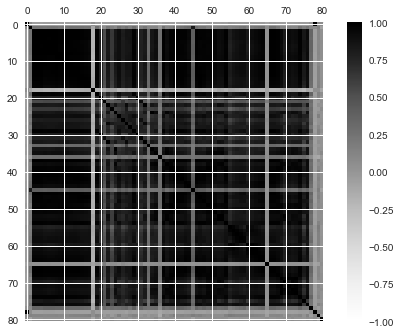

,County,MedianHouseholdIncome,TotalPopulation,Male,Female,Age0_4,Age5_9,Age10_14,Age15_19,Age20_24,...,BlindDisabledSSI,OASDI,SSIPayments,TotalReligiousAdherents,EvangelicalAdherents,CatholicAdherents,MormonAdherents,State,FoundryCounty,MexicanBorderCounty
County,1.000000,0.067116,-0.056199,-0.056485,-0.055911,-0.050042,-0.052198,-0.054043,-0.055648,-0.055601,...,-0.062658,-0.066757,-0.060970,-0.041826,-0.041717,-0.052814,0.017851,0.999975,0.089250,0.067691
MedianHouseholdIncome,0.067116,1.000000,0.240736,0.241549,0.239897,0.225163,0.241766,0.245316,0.237715,0.210551,...,0.116285,0.093374,0.096846,0.226594,0.151845,0.215286,0.098189,0.067560,0.131714,-0.084422
TotalPopulation,-0.056199,0.240736,1.000000,0.999878,0.999887,0.993822,0.992845,0.993800,0.995666,0.990912,...,0.927016,0.903805,0.918006,0.982892,0.837751,0.922834,0.337216,-0.055911,0.111819,0.036917
Male,-0.056485,0.241549,0.999878,1.000000,0.999531,0.994084,0.993391,0.994227,0.995954,0.991122,...,0.924295,0.903084,0.916502,0.982225,0.838495,0.922289,0.340897,-0.056197,0.110398,0.037674
Female,-0.055911,0.239897,0.999887,0.999531,1.000000,0.993340,0.992090,0.993161,0.995159,0.990482,...,0.929421,0.904292,0.919243,0.983309,0.836842,0.923145,0.333590,-0.055623,0.113162,0.036180
Age0_4,-0.050042,0.225163,0.993822,0.994084,0.993340,1.000000,0.997844,0.995710,0.993062,0.987887,...,0.926054,0.896446,0.912108,0.979440,0.861227,0.903243,0.362745,-0.049814,0.096701,0.046979
Age5_9,-0.052198,0.241766,0.992845,0.993391,0.992090,0.997844,1.000000,0.998742,0.994379,0.983160,...,0.910978,0.882282,0.897024,0.977008,0.866167,0.900030,0.366205,-0.051953,0.101863,0.043806
Age10_14,-0.054043,0.245316,0.993800,0.994227,0.993161,0.995710,0.998742,1.000000,0.996685,0.983521,...,0.912788,0.887738,0.901080,0.978613,0.856744,0.909634,0.361927,-0.053783,0.107640,0.043095
Age15_19,-0.055648,0.237715,0.995666,0.995954,0.995159,0.993062,0.994379,0.996685,1.000000,0.992471,...,0.924082,0.904703,0.916361,0.981506,0.840457,0.924458,0.347464,-0.055384,0.112920,0.043717
Age20_24,-0.055601,0.210551,0.990912,0.991122,0.990482,0.987887,0.983160,0.983521,0.992471,1.000000,...,0.936404,0.917847,0.929750,0.974735,0.829275,0.916972,0.347987,-0.055364,0.100656,0.046793


In [5]:
# Let's create a correlation matrix for the SES data. It's probably too much to keep all 85 covariates!

correlation = df_ses.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
plt.show()

correlation #print out the correlation results

# Well, that's not helpful. Let's try it again down below with a larger heatmap that Roy provided me

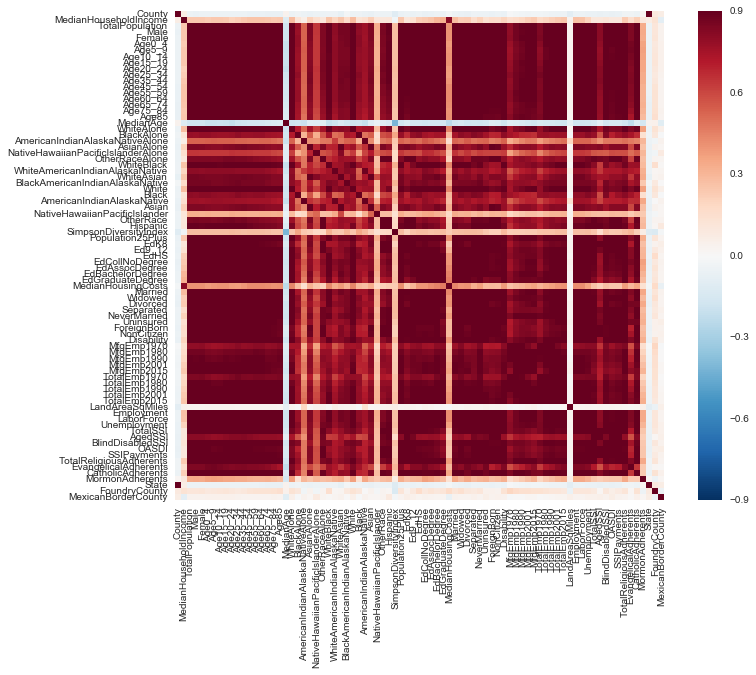

In [6]:
# What will this look like with a larger heatmap that Roy provided me?

corrmat = df_ses.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Hey! That's pretty neat. But, I still can't isolate any of the individual variables

### Excel Data Cleaning

- I am going to do a bit of data cleaning in Excel. Namely:
    - Remove some descriptive columns (e.g. I don't care as much about the breakdown of ages, e.g. 0-4, 4-10., and will just keep the median age
    - Rather than keep columns for every race, I am going to create 1 column for the percent of people who are White
    - Rather than keep for every education level, I am going to create 1 column for percent of people who have at least an associates degree
    - Turn some raw numbers into ratios/percentages (e.g. percent unemployed, percent uninsured, percent on disability, etc.)
- Note: I know that a lot of this is easy to do in Python (e.g. dropping columns, calculating percentages, etc.). In the interest of time, I will be manipulating this in Excel, but I wanted to acknowledge here that these are skills I'd ideally like to apply given additional time!

In [7]:
# OK, let's import in our updated county characteristics

df_ses = pd.read_csv("CountyCharacteristics_updated.csv") #we will overwrite our original data frame for organization

In [8]:
print df_ses.shape
print df_vote_registration.shape
print df_pres_election_results.shape
print df_states.shape

# Whew, that's so, so much better! How, let's look at each of our data sets 1-by-1

(3141, 24)
(3141, 22)
(3141, 18)
(51, 8)


In [9]:
# Let's start with some counts

print "Socioeconomic data counts"
print df_ses.count() 

# This data looks mostly populated. I won't plan to drop any records yet.

Socioeconomic data counts
County                   3141
MedianHouseholdIncome    3140
TotalPopulation          3141
PopAbove20               3141
Citizens                 3141
MedianAge                3141
PctMale                  3141
PctWhite                 3141
PctCollegePlusEdu        3141
PctUninsured             3141
PctForeignBorn           3141
PctNonCitizen            3141
PctDisability            3141
PctUnemployed            3141
PctSSI                   3141
PctOASDI                 3141
MedianHousingCosts       3141
PctReligious             3141
WoodardAmericanNation    3141
LandAreaSqMiles          3141
NCHS_UrbanRural2013      3139
State                    3141
FoundryCounty            3141
MexicanBorderCounty      3141
dtype: int64


In [10]:
print "Voter registration data counts"
print df_vote_registration.count()

# This data is much, much more sparse. It's likely because it varies state-by-state if you can register by party.
# I'll keep this raw data as is, but it might be really interesting to look later at how results change based on if 
# The state allows you to register based on your party

Voter registration data counts
State                3141
County               3141
Year                 3141
Month                3141
D                    1425
G                     528
L                     918
N                    3062
O                    1101
R                    1425
TotalRegistration    3141
dPct                 1425
rPct                 1425
leanD                1425
leanR                1425
unaffiliatedPct      3141
otherPct             1425
dDRPct               1425
rDRPct               1425
CountyName           3141
StateName            3141
StateAbbr            3141
dtype: int64


In [11]:
print "Presidential election data counts"
print df_pres_election_results.count()

# This table looks well populated. My immediate though for missing records is that those counties had sufficiently
# Small enough of a population where no votes for a 3rd party candidate were recorded

Presidential election data counts
County        3141
clinton       3141
trump         3141
johnson       3141
stein         2822
other         2902
totalvotes    3141
CountyName    3141
StateName     3141
StateAbbr     3141
dPct          3141
rPct          3141
leanD         3141
leanR         3141
otherPct      2902
dDRPct        3141
rDRPct        3141
State         3141
dtype: int64


In [12]:
print "State voting rights data counts"
print df_states.count()

# Every state is populated with voter ID information

State voting rights data counts
State                      51
StateName                  51
StateAbbr                  51
ElectoralVotes             51
AllowsPartyRegistration    51
VoterIDLaw                 51
VoterIDLawVerbose          51
ClosedPrimary              51
dtype: int64


In [13]:
# Let's start with a good old describe
print "Here is a describe table for socioeconomic data"
print df_ses.describe()
print "Here is a describe table for voter registration data"
print df_vote_registration.describe()
print "Here is a describe table for presidential election data"
print df_pres_election_results.describe()
print "Here is a describe table for state data"
print df_states.describe()

# Hmm, this isn't extremely helpful. Let's try correlation matrices instead

Here is a describe table for socioeconomic data
             County  MedianHouseholdIncome  TotalPopulation    PopAbove20  \
count   3141.000000            3140.000000     3.141000e+03  3.141000e+03   
mean   30388.545368           46824.208280     1.007688e+05  7.451979e+04   
std    15162.438257           12248.256362     3.230809e+05  2.383135e+05   
min     1001.000000           19328.000000     1.170000e+02  1.110000e+02   
25%    18179.000000           38825.500000     1.103100e+04  8.238000e+03   
50%    29177.000000           45094.500000     2.578300e+04  1.918100e+04   
75%    45081.000000           52247.750000     6.758200e+04  5.043400e+04   
max    56045.000000          123453.000000     1.003839e+07  7.430816e+06   

           Citizens    MedianAge  MedianHousingCosts  LandAreaSqMiles  \
count  3.141000e+03  3141.000000         3141.000000      3141.000000   
mean   9.374436e+04    40.868577          733.454951      1124.500662   
std    2.803946e+05     5.291303       

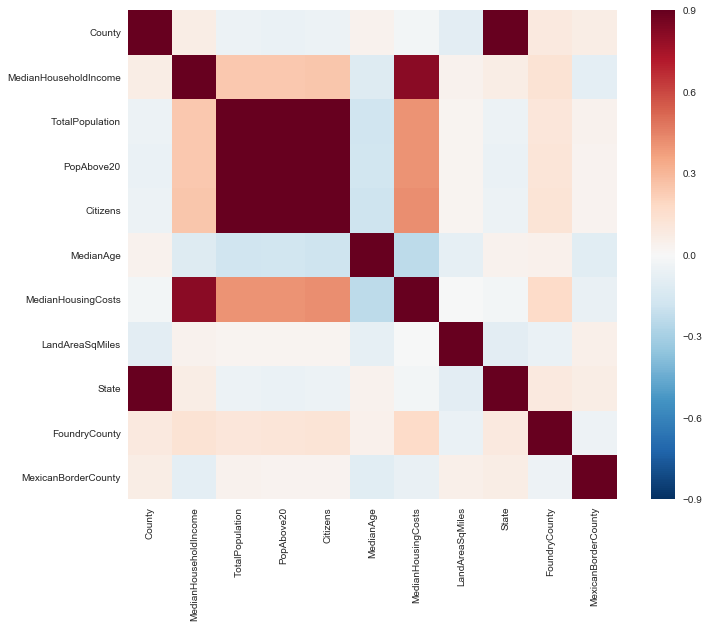

In [14]:
# Let's use that neat code that Roy shared with me and try a correlation matrix now with each of our data frames

corrmat = df_ses.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Now that is more like it! The red & dark red or blue & dark blue indicates variables that are highly correlated - either popstively or negatively
# A lot of these make sense - e.g. Household Income is highly correlated positively with Median housing costs
# State is highly correlated with county 
# Median housing costs are somewhat positively correlated with populations, which makes sense as cities are generally more expensive than rural areas

In [15]:
# Based on this matrix, I am going to drop median housing costs, as that will likely confound any modeling I do

df_ses.drop('MedianHousingCosts', axis=1, inplace=True)

print df_ses.head

<bound method DataFrame.head of       County  MedianHouseholdIncome  TotalPopulation  PopAbove20  Citizens  \
0       1001                51281.0            55221       39741     54747   
1       1003                50254.0           195121      147179    191033   
2       1005                32964.0            26932       20641     26478   
3       1007                38678.0            22604       16990     22437   
4       1009                45813.0            57710       42548     55908   
5       1011                31938.0            10678        8312     10291   
6       1013                32229.0            20354       15268     20309   
7       1015                41703.0           116648       87346    114655   
8       1017                34177.0            34079       25994     33800   
9       1019                36296.0            26008       20158     25946   
10      1021                41627.0            43819       32278     42040   
11      1023                3353

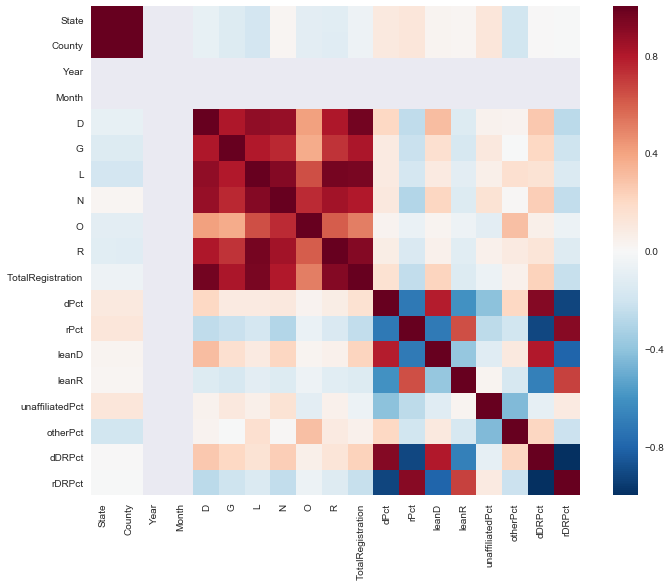

In [16]:
# Let's use that neat code that Roy shared with me and try a correlation matrix now with each of our data frames

corrmat = df_vote_registration.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# This clearly has a lot of strong positive & negative correlations, as this data set includes both raw numbers (e.g. number of registered Republicans)
# As well as percentages (e.g. percent of voters that are Republican)
# This is really going to mess up models we might do!

In [17]:
# Based on this matrix, I am going to drop all raw numbers (e.g. number of Republicans)
# I am also only going to keep the percentages, and drop any columns related to leaning Dem/Republican
# Also, since all the year & month data is the same, I will drop that too

df_vote_registration.drop(['Year','Month','D','G','L','N','O','R','leanD','leanR','dDRPct', 'rDRPct'], axis=1, inplace=True)

In [18]:
# Hey! Look how much cleaner that dataset looks!
df_vote_registration.head()

,State,County,TotalRegistration,dPct,rPct,unaffiliatedPct,otherPct,CountyName,StateName,StateAbbr
0,1,1001,34310.0,NaN,NaN,1.0,NaN,Autauga,Alabama,AL
1,1,1003,128743.0,NaN,NaN,1.0,NaN,Baldwin,Alabama,AL
2,1,1005,16218.0,NaN,NaN,1.0,NaN,Barbour,Alabama,AL
3,1,1007,12108.0,NaN,NaN,1.0,NaN,Bibb,Alabama,AL
4,1,1009,34276.0,NaN,NaN,1.0,NaN,Blount,Alabama,AL


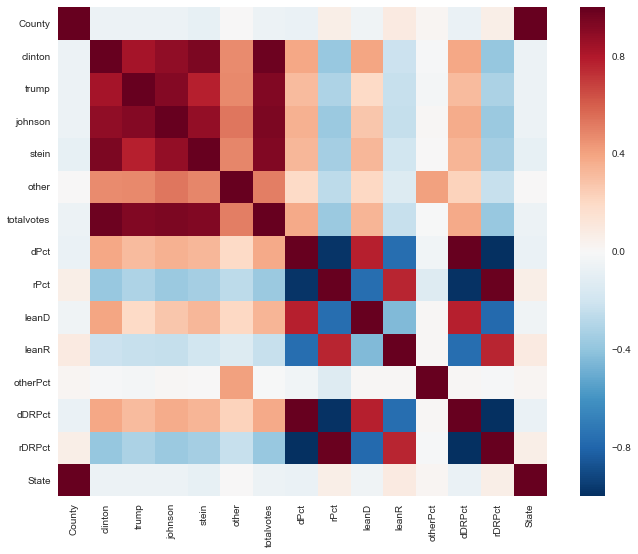

In [19]:
# One more correlation matrix now for Presidential Election data!

corrmat = df_pres_election_results.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [20]:
# Similar to the above matrix on registration data, we're going to only keep data on the total votes and the ratio of
# Democratic to Republican voters in that county

df_pres_election_results.drop(['clinton','trump','johnson','stein','other','dPct','rPct','leanD','leanR','otherPct'], axis=1, inplace=True)

In [21]:
# Hey Look how much cleaner that looks! 
df_pres_election_results.head()

,County,totalvotes,CountyName,StateName,StateAbbr,dDRPct,rDRPct,State
0,1001,24973,Autauga,Alabama,AL,0.246225,0.753775,1
1,1003,95215,Baldwin,Alabama,AL,0.202078,0.797922,1
2,1005,10469,Barbour,Alabama,AL,0.471768,0.528232,1
3,1007,8819,Bibb,Alabama,AL,0.217603,0.782397,1
4,1009,25588,Blount,Alabama,AL,0.086188,0.913812,1


In [22]:
print df_ses.head()
print df_vote_registration.head()
print df_states.head()
print df_pres_election_results.head()

   County  MedianHouseholdIncome  TotalPopulation  PopAbove20  Citizens  \
0    1001                51281.0            55221       39741     54747   
1    1003                50254.0           195121      147179    191033   
2    1005                32964.0            26932       20641     26478   
3    1007                38678.0            22604       16990     22437   
4    1009                45813.0            57710       42548     55908   

   MedianAge PctMale PctWhite PctCollegePlusEdu PctUninsured  \
0       37.7   48.4%    78.8%             20.4%        10.0%   
1       42.2   48.8%    87.9%             26.7%        12.8%   
2       38.8   53.8%    48.5%             13.8%        13.9%   
3       38.9   53.4%    77.9%             11.6%         8.9%   
4       40.7   49.4%    96.8%             15.5%        11.5%   

          ...         PctUnemployed PctSSI PctOASDI PctReligious  \
0         ...                  5.4%   2.7%     0.01  0.668912189   
1         ...               

In [23]:
# OK, now let's get a little crazy and join all of our data sets together, so we have 1 massive data set
# We've got some overlapping column names, so we'll have to be smart about suffixes so that we don't end up with column dupe errors

ses_registration = df_ses.merge(df_vote_registration, on = 'County')
ses_reg_votes = ses_registration.merge(df_pres_election_results, on = 'County')
all_the_data = ses_reg_votes.merge(df_states, on = 'State')

In [24]:
# Woohoo! We've got all the data
all_the_data.head()

,County,MedianHouseholdIncome,TotalPopulation,PopAbove20,Citizens,MedianAge,PctMale,PctWhite,PctCollegePlusEdu,PctUninsured,...,dDRPct,rDRPct,State,StateName,StateAbbr,ElectoralVotes,AllowsPartyRegistration,VoterIDLaw,VoterIDLawVerbose,ClosedPrimary
0,1001,51281.0,55221,39741,54747,37.7,48.4%,78.8%,20.4%,10.0%,...,0.246225,0.753775,1,Alabama,AL,9,False,3,Non-strict photo ID,False
1,1003,50254.0,195121,147179,191033,42.2,48.8%,87.9%,26.7%,12.8%,...,0.202078,0.797922,1,Alabama,AL,9,False,3,Non-strict photo ID,False
2,1005,32964.0,26932,20641,26478,38.8,53.8%,48.5%,13.8%,13.9%,...,0.471768,0.528232,1,Alabama,AL,9,False,3,Non-strict photo ID,False
3,1007,38678.0,22604,16990,22437,38.9,53.4%,77.9%,11.6%,8.9%,...,0.217603,0.782397,1,Alabama,AL,9,False,3,Non-strict photo ID,False
4,1009,45813.0,57710,42548,55908,40.7,49.4%,96.8%,15.5%,11.5%,...,0.086188,0.913812,1,Alabama,AL,9,False,3,Non-strict photo ID,False


In [25]:
all_the_data.columns

Index([u'County', u'MedianHouseholdIncome', u'TotalPopulation', u'PopAbove20',
       u'Citizens', u'MedianAge', u'PctMale', u'PctWhite',
       u'PctCollegePlusEdu', u'PctUninsured', u'PctForeignBorn',
       u'PctNonCitizen', u'PctDisability', u'PctUnemployed', u'PctSSI',
       u'PctOASDI', u'PctReligious', u'WoodardAmericanNation',
       u'LandAreaSqMiles', u'NCHS_UrbanRural2013', u'State_x',
       u'FoundryCounty', u'MexicanBorderCounty', u'State_y',
       u'TotalRegistration', u'dPct', u'rPct', u'unaffiliatedPct', u'otherPct',
       u'CountyName_x', u'StateName_x', u'StateAbbr_x', u'totalvotes',
       u'CountyName_y', u'StateName_y', u'StateAbbr_y', u'dDRPct', u'rDRPct',
       u'State', u'StateName', u'StateAbbr', u'ElectoralVotes',
       u'AllowsPartyRegistration', u'VoterIDLaw', u'VoterIDLawVerbose',
       u'ClosedPrimary'],
      dtype='object')

In [26]:
# We need to remove the columns that got suffixed with an _x or _y because it was a repeat column

all_the_data.drop(['State_x','CountyName_x','StateName_x','StateAbbr_x','State_y','StateName_y','CountyName_y','StateName_y','StateAbbr_y','FoundryCounty'], axis=1, inplace=True)

In [27]:
#awesome! all of the prefixed columns are 
all_the_data.head()

,County,MedianHouseholdIncome,TotalPopulation,PopAbove20,Citizens,MedianAge,PctMale,PctWhite,PctCollegePlusEdu,PctUninsured,...,dDRPct,rDRPct,State,StateName,StateAbbr,ElectoralVotes,AllowsPartyRegistration,VoterIDLaw,VoterIDLawVerbose,ClosedPrimary
0,1001,51281.0,55221,39741,54747,37.7,48.4%,78.8%,20.4%,10.0%,...,0.246225,0.753775,1,Alabama,AL,9,False,3,Non-strict photo ID,False
1,1003,50254.0,195121,147179,191033,42.2,48.8%,87.9%,26.7%,12.8%,...,0.202078,0.797922,1,Alabama,AL,9,False,3,Non-strict photo ID,False
2,1005,32964.0,26932,20641,26478,38.8,53.8%,48.5%,13.8%,13.9%,...,0.471768,0.528232,1,Alabama,AL,9,False,3,Non-strict photo ID,False
3,1007,38678.0,22604,16990,22437,38.9,53.4%,77.9%,11.6%,8.9%,...,0.217603,0.782397,1,Alabama,AL,9,False,3,Non-strict photo ID,False
4,1009,45813.0,57710,42548,55908,40.7,49.4%,96.8%,15.5%,11.5%,...,0.086188,0.913812,1,Alabama,AL,9,False,3,Non-strict photo ID,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e4402d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ef99550>]], dtype=object)

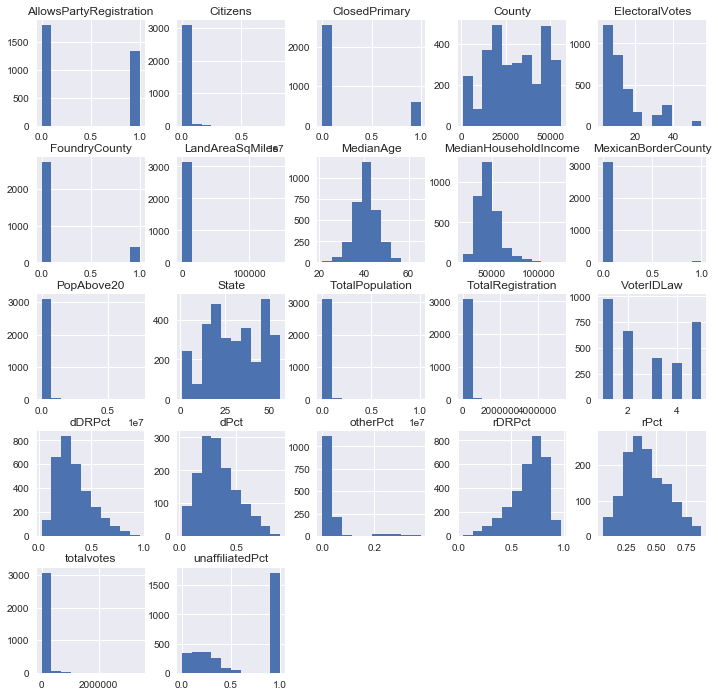

In [28]:
# Let's do some histograms on each of our variables so we can get an idea of distribution

all_the_data.hist(figsize=(12,12))

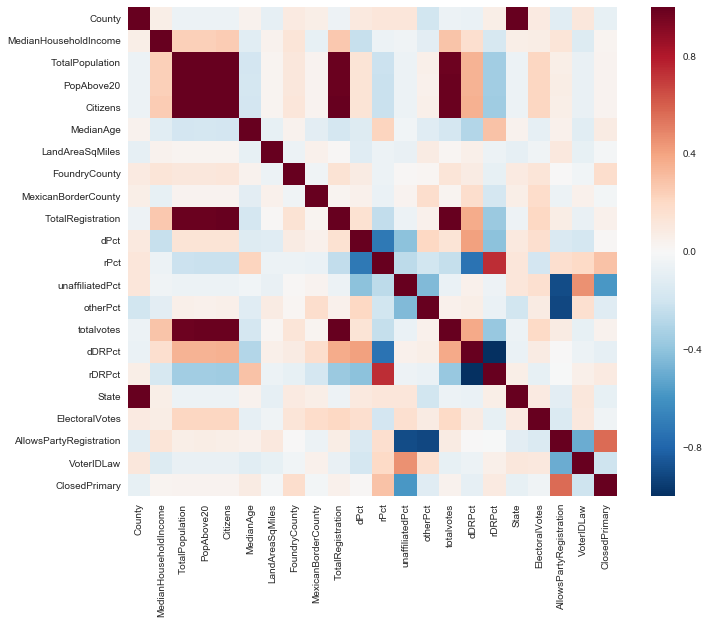

In [29]:
# Let's do a correlation matrix now to look at how all of our merged data sets are correlated

corrmat = all_the_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Immediate observations: Total population is highly positively correlated with population above 20, Number of citizens, Total number of registered voters, total number of voters
# States allowing party registration is negatively correlated with a high percentage of "unaffiliated" voters

# Now that we have a finalized data set, let's create a data dictionary

Variable | Description | Type of Variable
---| ---| ---
County | Code tied to US County | categorial/discrete
MedianHouseholdIncome | Median household income | continuous
TotalPopulation| Total population by county | categorical
PopAbove20| Number of people above age 20 | categorical
Citizens | Number of people who are citizens | categorical
MedianAge | Median age of resident | continuous
PctMale| Percent of residents that are male | continuous
PctWhite| Percent of residents that are White | continuous
PctCollegePlusEdu| Percent of residents with at least an Associates degree | continuous
PctUninsured| Percent of residents that are unisured | continuous
PctForeignBorn| Percent of residents not born in the US | continuous
PctNonCitizen| Percent of residents who are not US citizens | continuous
PctDisability| Percent of residents who are on Disability | continuous
PctUnemployed| Percent of residents who are in the Labor Force but unemployed | continuous
PctSSI| Percent of residents who are on Supplemental Security Income for elderly | continuous
PctOASDI| Percent of residents who are on Social Security | continuous
PctReligious| Percent of residents who identify as religious| continuous
WoodardAmericanNation| Regional classifications (i.e. Deep South, Appalachia) | categorical
LandAreaSqMiles| Area of county in square miles |  continuous
NCHS_UrbanRural2013| Classification of area (e.g. metro, rural, etc) |  categorical
MexicanBorderCounty| Boolean for if the county borders Mexico  |  categorical / boolean
TotalRegistration| Total number of voters registered - 2016 |  categorical
dPct| Percent of voters that are registered Democrats - 2016  |  continuous
rPct| Percent of voters that are registered Republicans - 2016 |  continuous
unaffiliatedPct| Percent of voters that are Unaffiliated - 2016 |  continuous
otherPct| Percent of voters that registered for a 3rd Party - 2016 |  continuous
totalvotes| Total number of votes cast in the 2016 Presdiential election | categorical
dDRPct| Pct of votes that were Democratic (out of Democractic & Repub votes) |  continuous
rDRPct| Pct of votes that were Republican (out of Democractic & Repub votes) |  continuous
State| State that the county is in (2 letter abbreviation) |  categorical
StateName| Full name of state that the county is in |  categorical
StateAbbr| Area of county in square miles |  categorical
ElectoralVotes| Number of electoral votes that state has|  categorical
AllowsPartyRegistration| True/False boolean for if the State allows voters to register for a party |  categorical/boolean
VoterIDLaw| State voter ID law - number |  categorical
VoterIDLawVerbose| State voter ID law - description (e.g. strict photo, no photo required, etc.) | categorical
ClosedPrimary| True/False boolean for if the State has closed primaries. |  categorical / boolean

# Analysis Part 2 - Calculate Additional Variables

Before digging into modeling, I want to create 2 additional variables that I think might be helpful/interesting:

- Percent of residents that are registered to vote in 2016
- Percent of registered voters who voted in 2016
- Flag for if the county voted Democratic or Republican in 2016

Assumption Time! Ideally we'd be able to look at citizens who are above the age of 18. However, while we know the number of citizens, and the number of people over the age of 20, we don't have all the information we'd need on percent of eligible citizens who are able to vote. We also don't know the number of citizens who are not eligible to vote, e.g. due to felonies. Therefore, we will proxy "voter registration percentages" by calculating the % of adults registered to vote like this:

- TotalRegistration / PopAbove20

In [38]:
# Let's create a variable for percentage of residents that are registered to vote

all_the_data['registeredtovote_pct'] = (all_the_data['TotalRegistration'] * 1.0) / all_the_data['PopAbove20']

In [59]:
# Print the first few records to ensure we calculated it correctly. We did, yay!
all_the_data[['TotalRegistration', 'PopAbove20','registeredtovote_pct']].head()

,TotalRegistration,PopAbove20,registeredtovote_pct
0,34310.0,39741,0.863340
1,128743.0,147179,0.874738
2,16218.0,20641,0.785718
3,12108.0,16990,0.712655
4,34276.0,42548,0.805584


In [60]:
# Let's create a variable for percentage of registered voters who voted in the 2016 election
all_the_data['voted2016_pct'] = (all_the_data['totalvotes'] * 1.0) / all_the_data['TotalRegistration']

In [62]:
# Print the first few records to ensure we calculated it correctly. We did, yay!
all_the_data[['totalvotes','TotalRegistration','voted2016_pct']].head()

,totalvotes,TotalRegistration,voted2016_pct
0,24973,34310.0,0.727864
1,95215,128743.0,0.739574
2,10469,16218.0,0.645517
3,8819,12108.0,0.728361
4,25588,34276.0,0.746528


In [69]:
# Finally, let's create a conditional variable based on how the county voted in 2016 to signal if the county went Republican or Democrat

all_the_data['voted2016_pct'] = ("Clinton" if all_the_data['dDRPct'] > all_the_data['rDRPct'] else "Trump")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [65]:
all_the_data[['registeredtovote_pct','voted2016_pct']].describe()

,registeredtovote_pct,voted2016_pct
count,3141.000000,3141.000000
mean,0.869401,0.695369
std,0.125642,0.352188
min,0.329142,0.348556
25%,0.789549,0.631639
50%,0.873834,0.691956
75%,0.949200,0.744196
max,2.040469,19.716800


# Analysis Part 3 - Deeper Analysis & Modeling

# Analysis Part 4 - Findings, Summary, Recommendation